# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


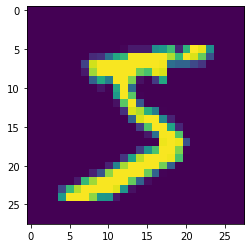

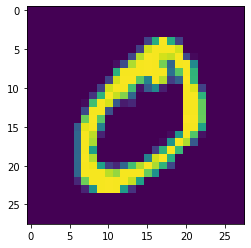

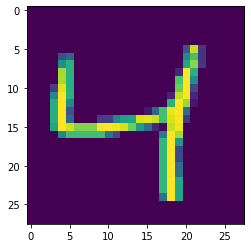

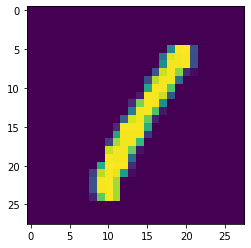

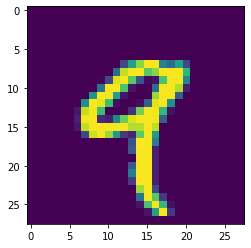

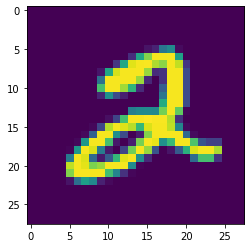

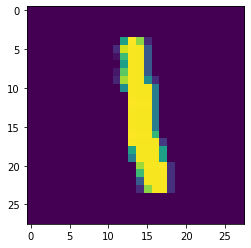

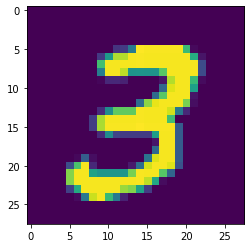

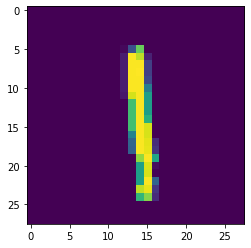

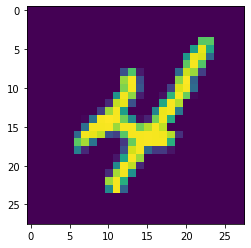

In [24]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
for i in range(0,10):
  plt.figure()
  plt.imshow(X_train[i])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [27]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [29]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32,( 3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, activation='relu'))

model.add(Convolution2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))

model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 32)        2080      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 5, 5, 32)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.1375 - acc: 0.9567
Epoch 2/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.0485 - acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0357 - acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.0296 - acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0229 - acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0198 - acc: 0.9935
Epoch 7/10
60000/60000 [==============================] - 25s 412us/step - loss: 0.0167 - acc: 0.9948
Epoch 8/10
60000/60000 [==============================] - 26s 431us/step - loss: 0.0147 - acc: 0.9954
Epoch 9/10
60000/60000 [==============================] - 26s 427us/step - loss: 0.0136 - acc: 0.9956
Epoch 10/10
60000/60000 [==============================] - 26s 426us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [45]:
print(score)

[0.032171424890264276, 0.9918]


In [0]:
  y_pred = model.predict(X_test)

In [47]:
print(y_pred[:9])
print(y_test[:9])

[[6.25274030e-14 3.04572827e-13 1.27869715e-08 2.57743373e-08
  1.45514484e-14 3.65242572e-14 2.26644866e-23 1.00000000e+00
  5.66820462e-12 1.67006786e-09]
 [5.13596945e-15 2.34870789e-10 1.00000000e+00 1.54586990e-19
  6.40853134e-18 2.37533928e-20 9.97252073e-11 1.04988949e-19
  8.36133571e-13 1.31585089e-21]
 [1.63432823e-10 9.99999285e-01 5.19957908e-08 1.65304437e-10
  1.04775015e-08 2.14297398e-08 6.73974057e-07 4.61267362e-08
  4.70264316e-09 9.95791644e-11]
 [9.99984741e-01 2.58827004e-13 6.36010755e-09 1.51514523e-09
  5.44309216e-15 2.76249921e-12 1.52777029e-05 1.70128061e-12
  1.12583418e-08 1.79538052e-14]
 [8.02855436e-14 1.08933977e-14 1.78656916e-12 1.04612669e-13
  1.00000000e+00 8.57040483e-16 2.03512474e-09 9.05010523e-14
  1.56919477e-09 7.76889275e-10]
 [2.80089667e-11 9.99999881e-01 5.13173717e-08 2.50674438e-12
  3.48123108e-09 3.80390275e-10 3.17670121e-08 1.39524474e-07
  1.14330978e-09 1.60875722e-11]
 [1.06879155e-17 3.05430702e-13 6.25776178e-13 3.90279028e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

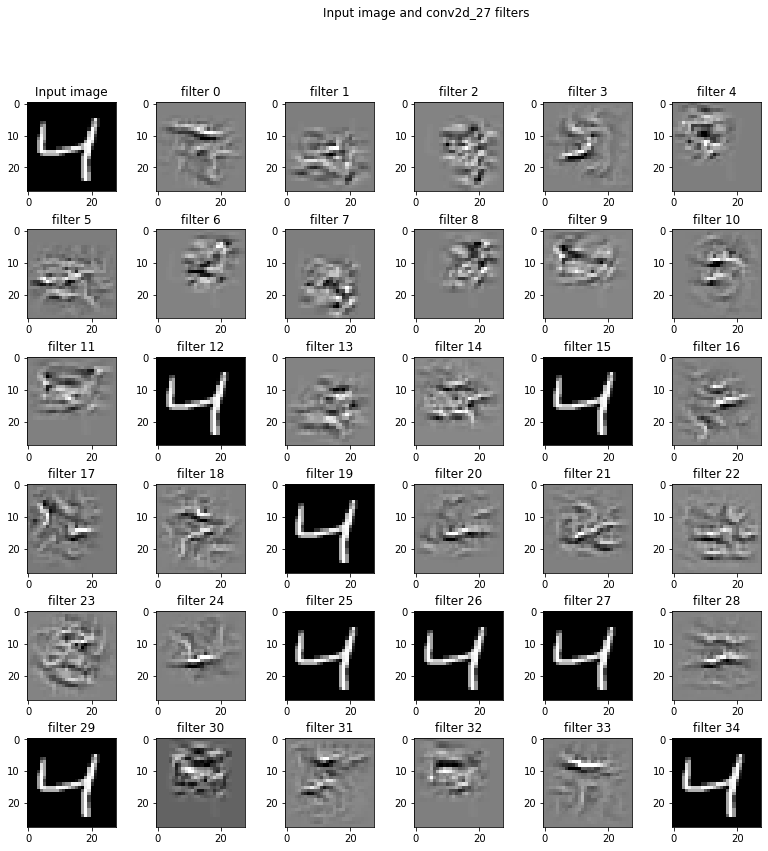

In [50]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_27'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

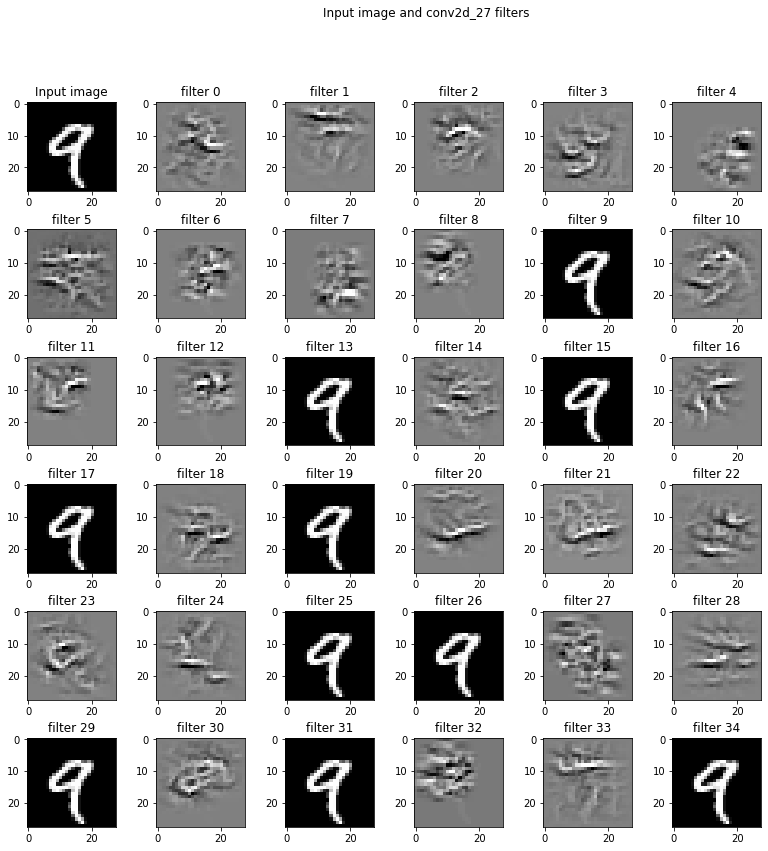

In [51]:
vis_img_in_filter(img = np.array(X_train[4]).reshape((1, 28, 28, 1)).astype(np.float64),  \
                      layer_name = 'conv2d_27')